# Linear models for regression

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

## Jupyter Widgets

- [Docs](https://ipywidgets.readthedocs.io/en/stable/index.html)
- [Installation](https://ipywidgets.readthedocs.io/en/stable/user_install.html)

Jupyter Widgets are interactive browser controls for Jupyter notebooks. Examples include:
- Basic form controls like sliders, checkboxes, text inputs
- Container controls like tabs, accordions, horizontal and vertical layout boxes, grid layouts
- Advanced controls like maps, 2d and 3d visualizations, datagrids, and more

Installation: `pip install ipywidgets`

In [6]:
# !pip install ipywidgets

In [5]:
# %pip install ipywidgets

In [7]:
import ipywidgets as widgets

In [8]:
widgets.IntSlider()

IntSlider(value=0)

In [10]:
# You can also explicitly display the widget using display(...).
from IPython.display import display
w = widgets.IntSlider()
display(w)

IntSlider(value=0)

In [12]:
# If you display the same widget twice, the displayed instances in the front-end will remain in sync with each other. 
# Try dragging the slider below and watch the slider above.
display(w)

IntSlider(value=0)

[Widget List](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html)

## Linear regression theory

Another name for a linear model with one input variable is **univariate linear regression**.

In [13]:
# y = m*x + c

<img src="images/lm_img01.png">

<img src="images/lm_img02.png">

<img src="images/lm_img03.png">

In [16]:
# x_train is the input variable (size in 1000 square feet)
# y_train is the target (price in 1000s of dollars)
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1. 2.]
y_train = [300. 500.]


In [17]:
# m is the number of training examples
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

x_train.shape: (2,)
Number of training examples is: 2


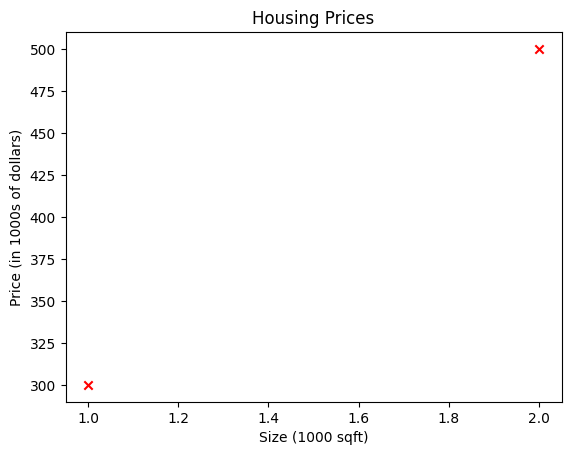

In [18]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()

In [19]:
from ipywidgets import interact, IntSlider

In [20]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      y (ndarray (m,)): target values
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

In [21]:
def plot_housing_prices(w = 1, b=100):
    plt.figure(figsize=(6,4))
    
    ## Set up the figure axes, etc.
    plt.xlim(0.5, 2.5)
    plt.ylim(0, 1000)
    plt.title("Housing Prices")
    plt.xlabel('Size (1000 sqft)')
    plt.ylabel('Price (in 1000s of dollars)')
    
    tmp_f_wb = compute_model_output(x_train, w, b,)
    # Plot our model prediction
    plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')
    # Plot the data points
    plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')
    
interact(plot_housing_prices, 
         w=IntSlider(min=0, max=500, step=20, value=300), 
         b=IntSlider(min=-300, max=800, step=20, value=200))

interactive(children=(IntSlider(value=300, description='w', max=500, step=20), IntSlider(value=200, descriptio…

<function __main__.plot_housing_prices(w=1, b=100)>

In [22]:
w = 200                         
b = 100    
x_i = 1.2
cost_1200sqft = w * x_i + b    

print(f"${cost_1200sqft:.0f} thousand dollars")

$340 thousand dollars


<img src="images/lm_img04.png">

In [24]:
from helpers.lab_utils_lm import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
plt.style.use('./helpers/deeplearning.mplstyle')

In [25]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

In [26]:
x_train = np.array([1.0, 2.0])           #(size in 1000 square feet)
y_train = np.array([300.0, 500.0])           #(price in 1000s of dollars)

plt_intuition(x_train,y_train)

interactive(children=(IntSlider(value=150, description='w', max=400, step=10), Output()), _dom_classes=('widge…

In [27]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730,])

In [28]:
%matplotlib widget

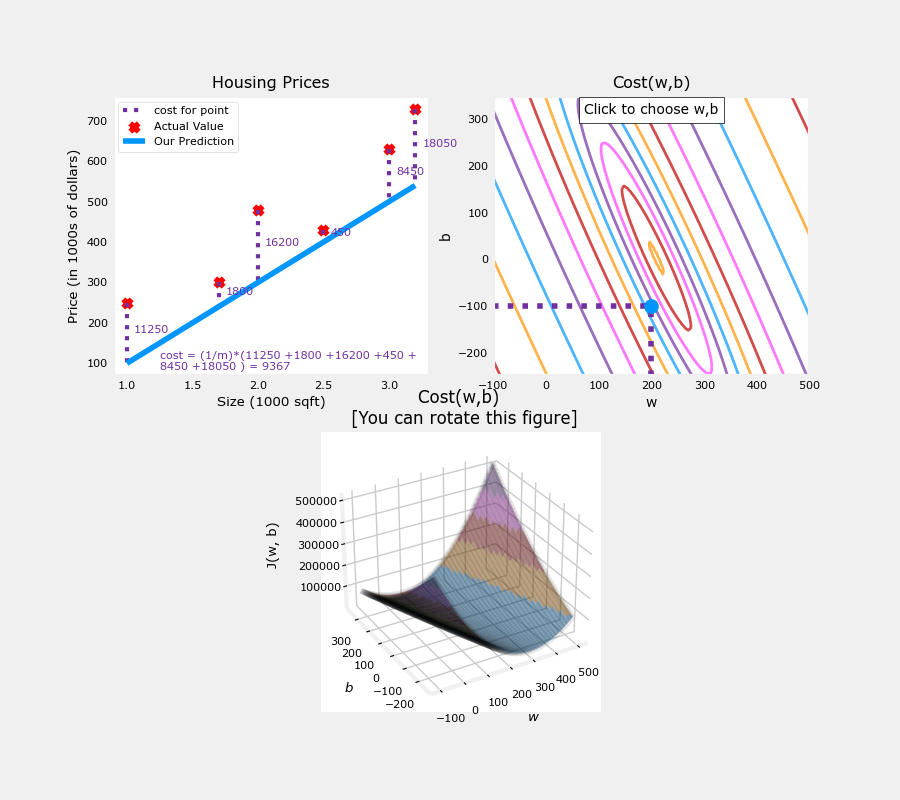

In [29]:
plt.close('all') 
fig, ax, dyn_items = plt_stationary(x_train, y_train)
updater = plt_update_onclick(fig, ax, x_train, y_train, dyn_items)

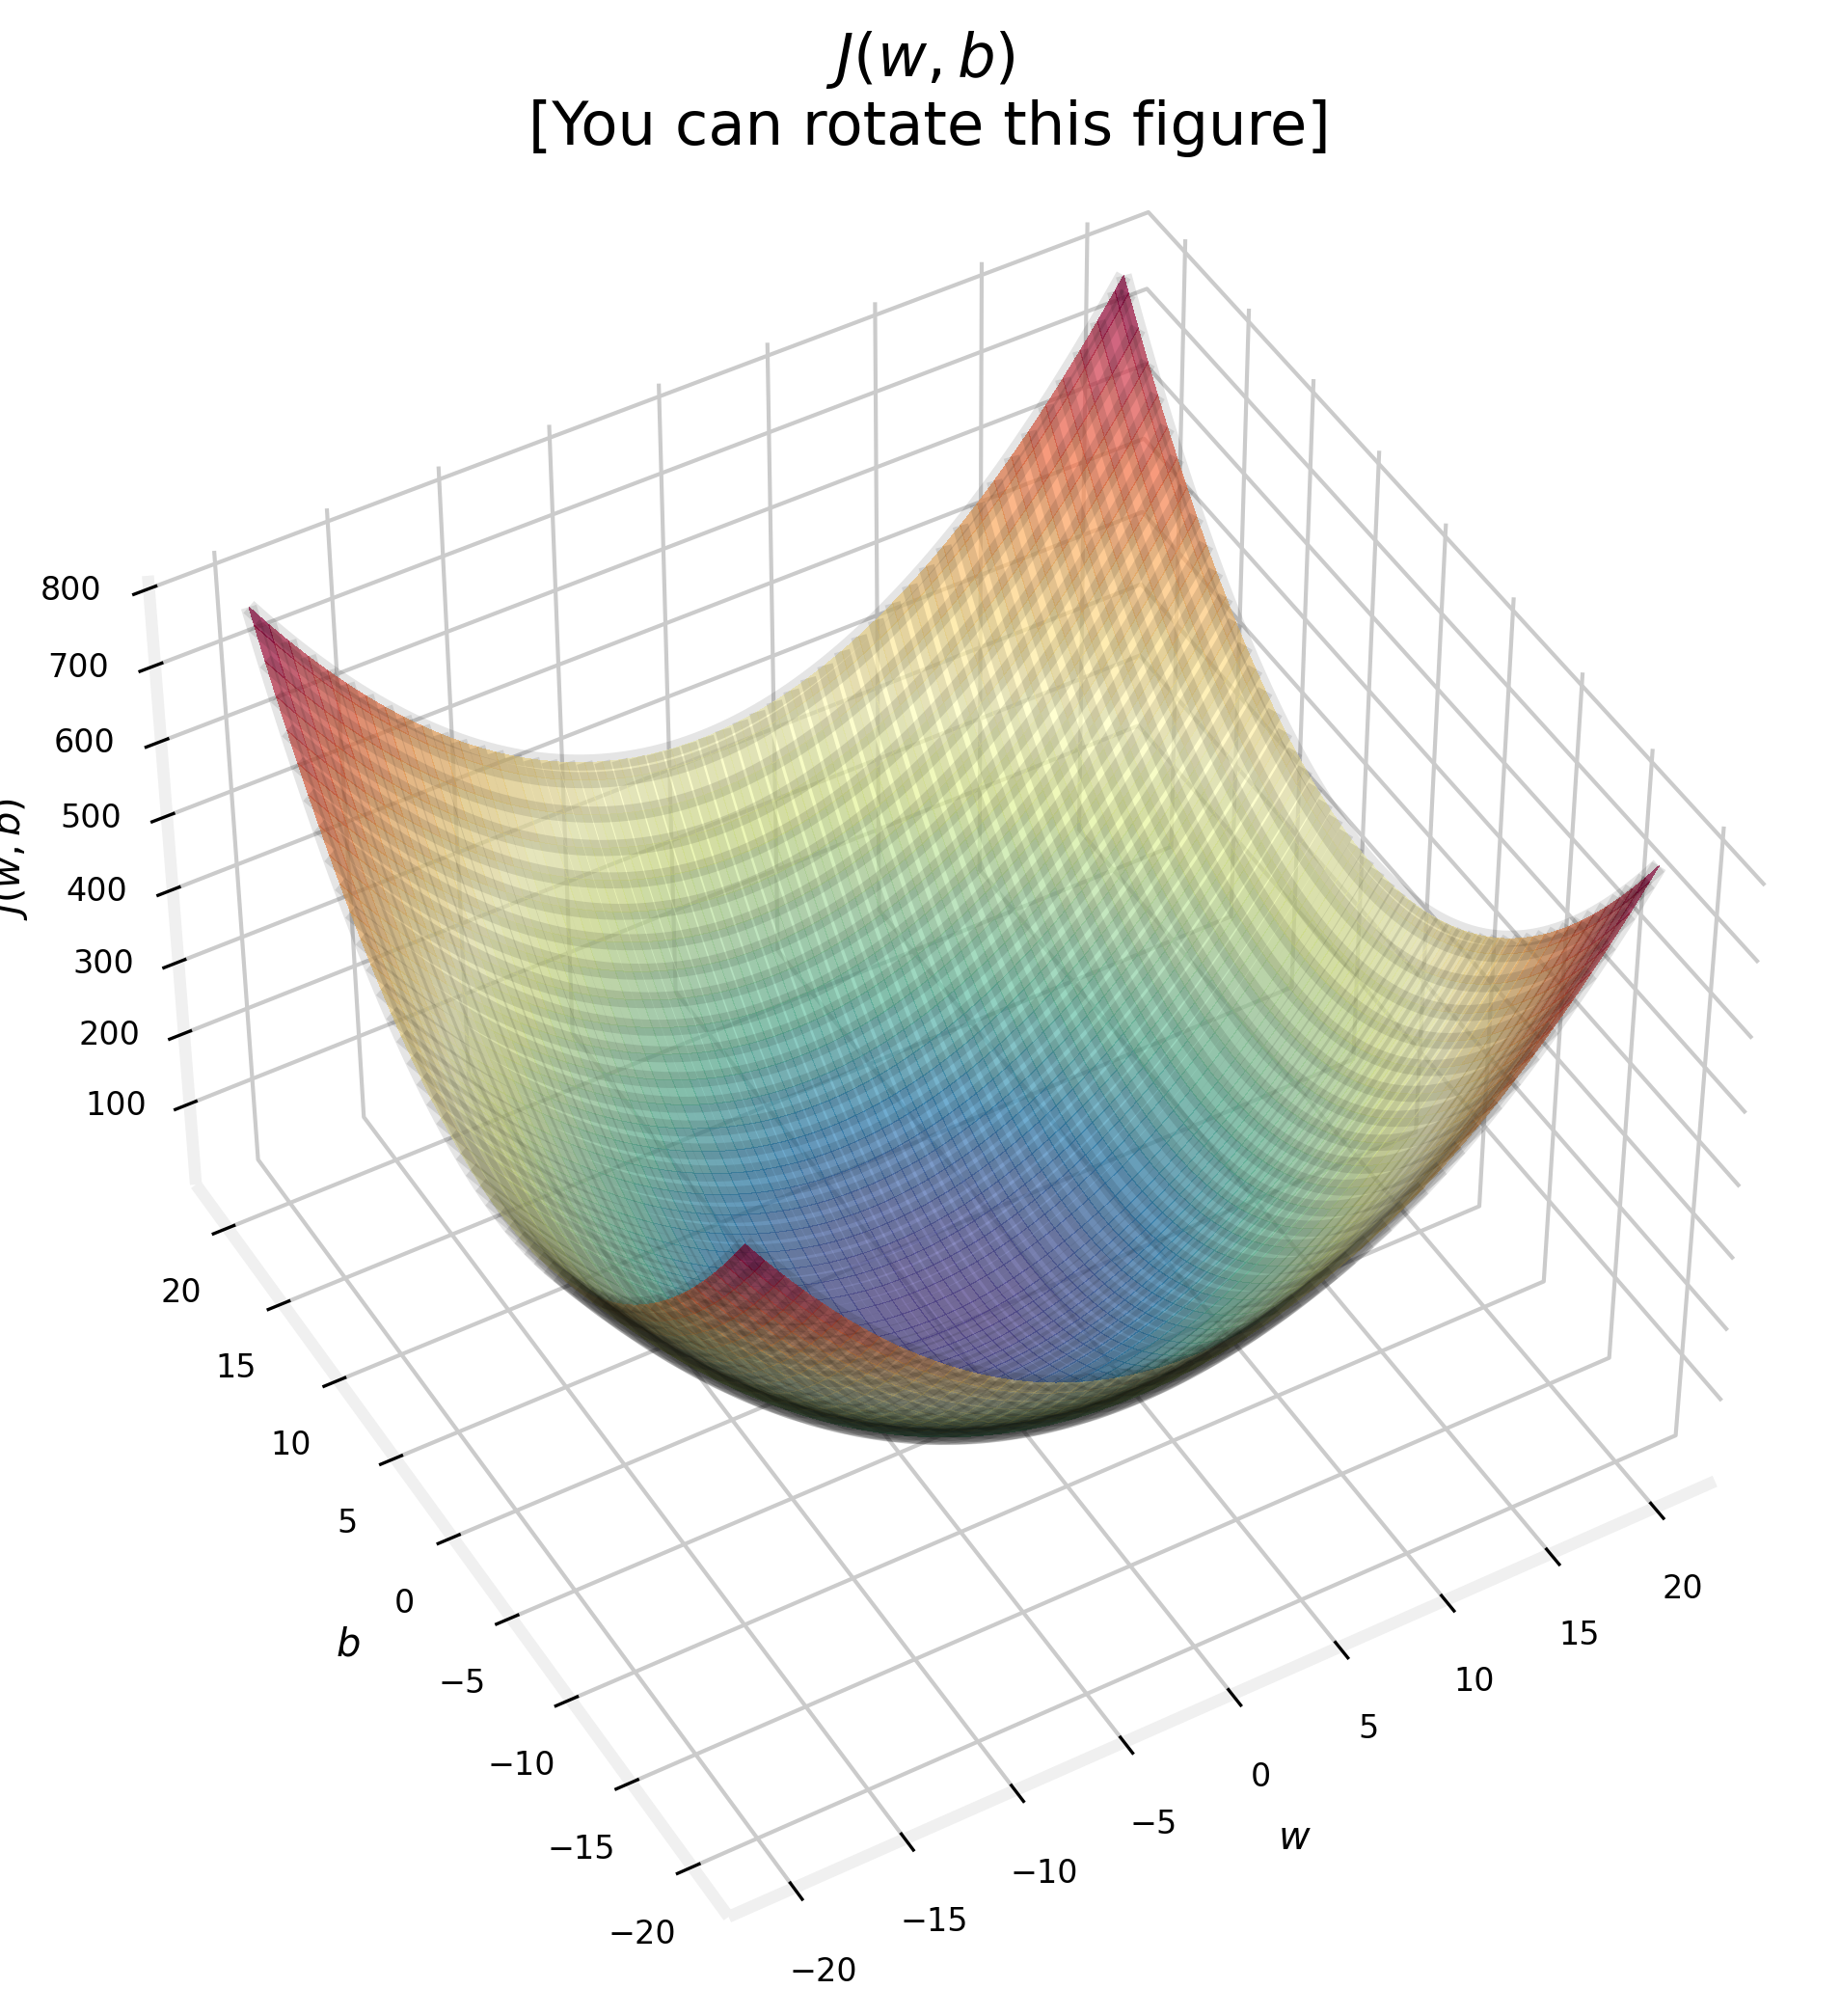

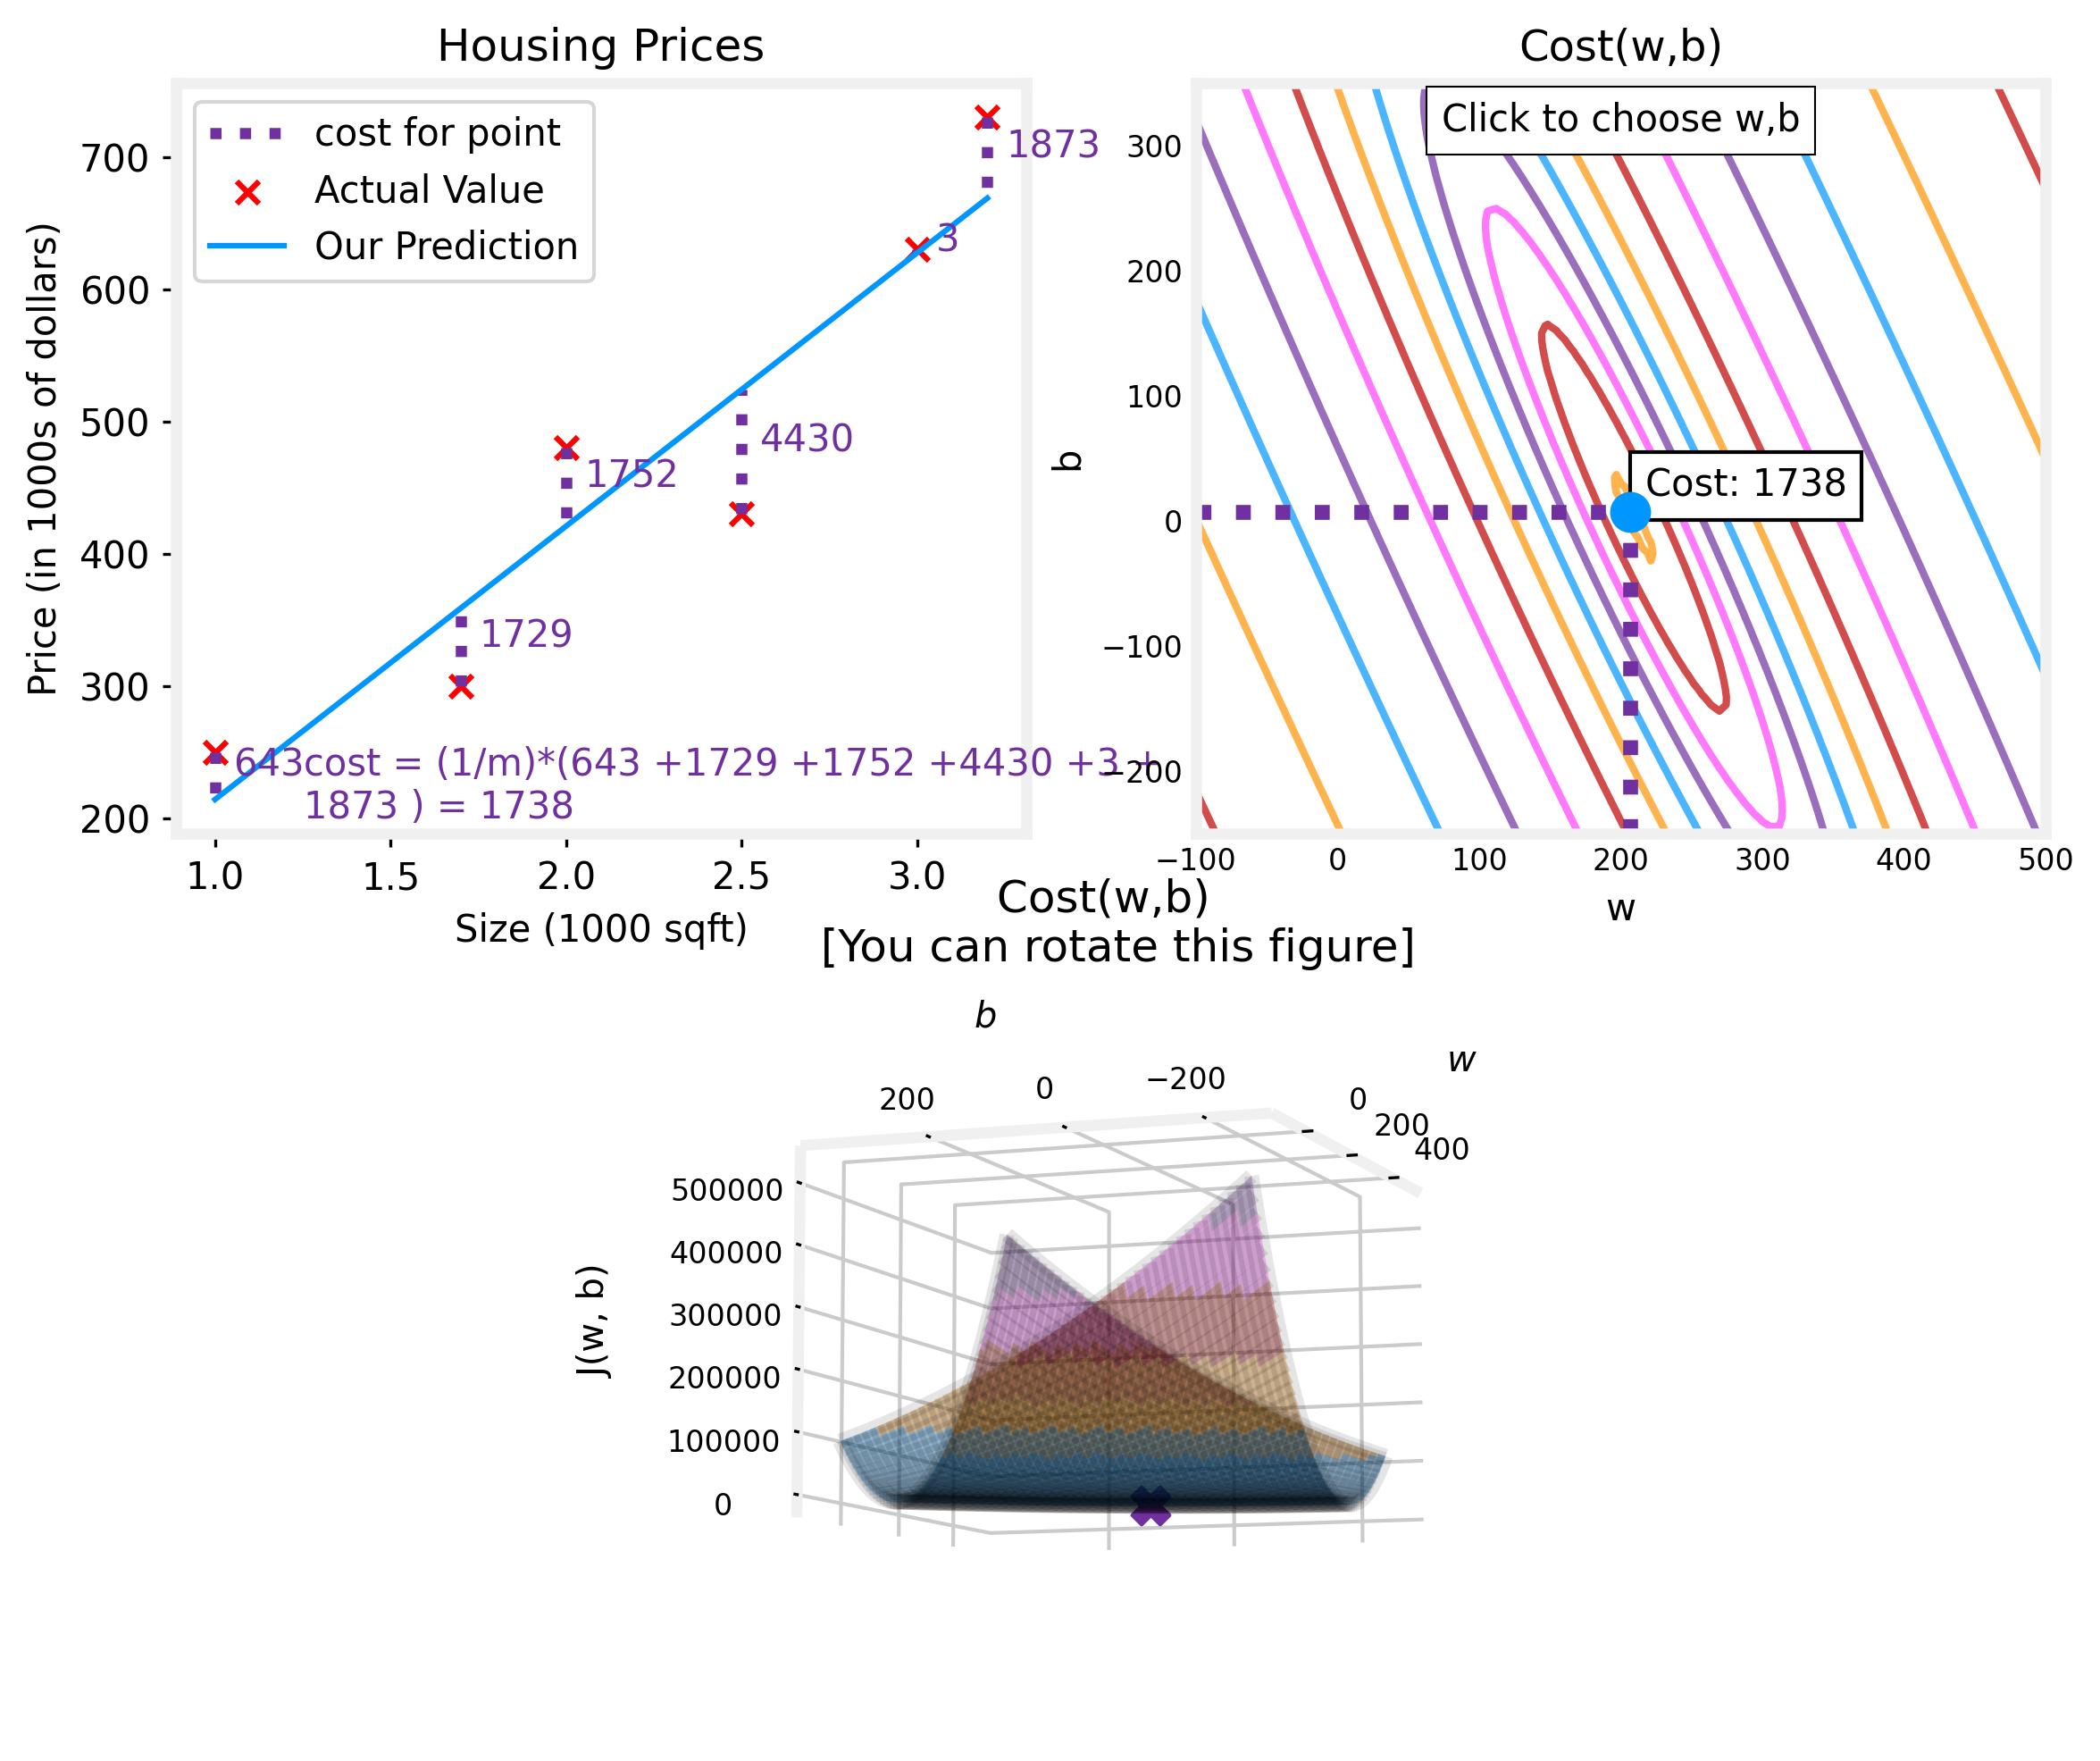

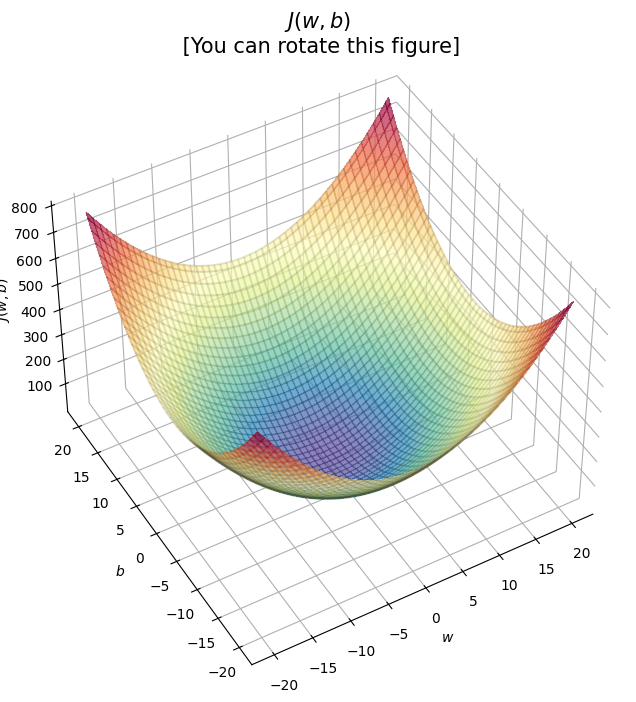

In [32]:
soup_bowl()

In [34]:
%matplotlib inline
plt.style.use('default')

For regression, the general prediction formula for a linear model looks as follows:

`ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b`

In [35]:
# y = w[0]*x[0] + w[1]*x[1]   + b

C:\Users\Fakulteta\Desktop\WORK\python-machine-learning-public\02_Nadzorovano_ucenje\helpers\datasets.py:31: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
C:\Users\Fakulteta\Desktop\WORK\python-machine-learning-public\02_Nadzorovano_ucenje\helpers\datasets.py:42: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


w[0]: 0.393906  b: -0.031804


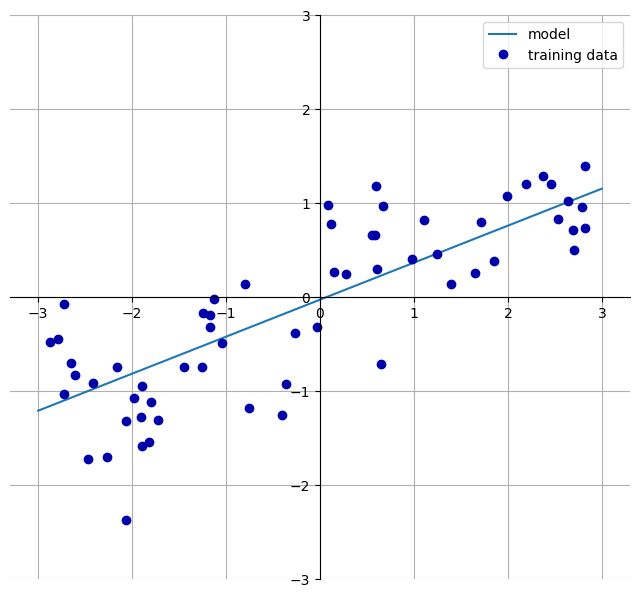

In [36]:
from helpers.plot_linear_regression_wave import plot_linear_regression_wave

plot_linear_regression_wave()
plt.show()

There are **many different linear models for regression.**

- The difference between these models lies in **how the model parameters w and b are learned** from the training data,
and **how model complexity can be controlled**.

## Linear regression with sklearn

**Linear regression has no parameters, which is a benefit, but it also has no way to control model complexity.**

<img src="https://cdn-images-1.medium.com/max/800/1*fX95txC9xSwSPeP6ch2nmg.gif">

<img alt="Visualizing RSS" src="https://s3.amazonaws.com/dq-content/235/visualizing_rss.svg">

[sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html): Ordinary least squares Linear Regression.
- `sklearn.linear_model.LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)`
    - [fit_interceptbool, default=True](https://stackoverflow.com/questions/46779605/in-the-linearregression-method-in-sklearn-what-exactly-is-the-fit-intercept-par)

In [38]:
import helpers

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = helpers.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

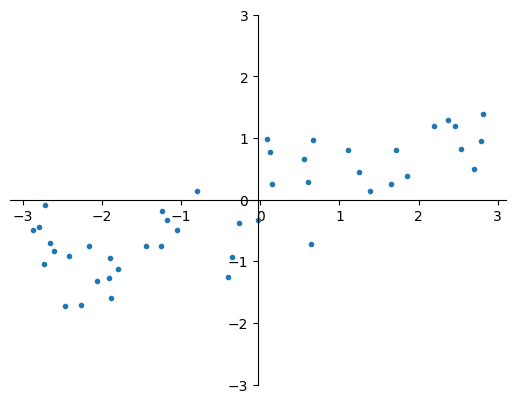

In [39]:
plt.plot(X_train,y_train, ".")
ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.set_ylim(-3, 3)

plt.show()

- The slope parameters (w), also called weights or coefficients, are stored in the `coef_`
attribute
- The offset or intercept (b) is stored in the `intercept_` attribute

In [40]:
print(f"lr.coef_: {lr.coef_}")
print(f"lr.intercept_: {lr.intercept_}")

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


>  **scikit-learn always stores anything
that is derived from the training data in attributes that end with a
trailing underscore**. That is to separate them from parameters that
are set by the user.

In [45]:
print(f"Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Test set score: {lr.score(X_test, y_test):.2f}")

Training set score: 0.67
Test set score: 0.66


## Multiple linear regression

**Multiple linear regression is used to estimate the relationship between two or more independent variables and one dependent variable.**

In [48]:
from helpers.datasets import load_extended_boston

X, y = load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [49]:
print(f"Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Test set score: {lr.score(X_test, y_test):.2f}")

Training set score: 0.95
Test set score: 0.61


## Strengths and weaknesses

**Strengths**:
- Linear models are **very fast** to train, and also fast to predict. 
- They **scale to very large datasets** and **work well with sparse data**. 
- Another strength of linear models is that they make it relatively **easy to understand how a prediction is made**, using the formulas we saw earlier for regression and classification.
    - Unfortunately, it is often not entirely clear why coefficients are the way they are. This is particularly true if your dataset has highly correlated features; in these cases, the coefficients might be hard to interpret.
- Linear models often **perform well when the number of features is large compared to the number of samples**. 
- They are also often used on very large datasets, simply because it’s not feasible to train other models. 

**Weaknesses**:
- However, in lower-dimensional spaces, other models might yield better generalization performance.